## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [123]:
your_name = "Van Trang Nguyen"
your_student_id = "47772174"

In [124]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [125]:
# Reading csv files as dataframes
ds1 = 'data/car_sell.csv'
df1 = pd.read_csv(ds1)

In [126]:
# Display the dataframe
df1.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [127]:
# Print the length of the data before removing missing data
print("The original length of data:", len(df1))

The original length of data: 4340


In [128]:
# Counting number of Null values in each column
print(df1.isnull().sum())

Unnamed: 0         0
name               0
year             310
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64


In [129]:
# Removing records that year is missing
df1_cleaned = df1.dropna(subset=['year'])
# Removing records that year is missing
df1_final = df1_cleaned[df1_cleaned['fuel']!='none']

In [130]:
#Checking whether we remove outliers correctly
print(df1_final.isnull().sum())

Unnamed: 0       0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [131]:
# Print the length of the data after removing missing data
print("The length of the data after removing outliers is:", len(df1_final))

The length of the data after removing outliers is: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [132]:
# Counting the number of unique name
unique_name_count = df1_final['name'].nunique()
unique_type_count = df1_final['seller_type'].nunique()
unique_transmission_count = df1_final['transmission'].nunique()
unique_owner_count = df1_final['owner'].nunique()
# Print the number of unique name
print("The number of unique name is:", unique_name_count)
print("The number of unique seller type is:", unique_type_count)
print("The number of unique transmission is:", unique_transmission_count)
print("The number of unique owner is:", unique_owner_count)

The number of unique name is: 1402
The number of unique seller type is: 3
The number of unique transmission is: 2
The number of unique owner is: 5


In [133]:
# Descriptive statistics of km_driven 
km_driven_desc = df1_final['km_driven'].describe()
# Print total number, mean, std, min and max
print("Total number:", km_driven_desc['count'])
print("Mean:", km_driven_desc['mean'])
print("Standard Deviation:", km_driven_desc['std'])
print("Minimum:", km_driven_desc['min'])
print("Maximum:", km_driven_desc['max'])

Total number: 3886.0
Mean: 66313.27920741122
Standard Deviation: 46679.603915975706
Minimum: 1.0
Maximum: 806599.0


In [136]:
# Group the data set by seller_type
new_data = df1_final.groupby('seller_type')
# Descriptive statistics of selling_price grouped by seller_type
selling_price_desc = new_data['selling_price'].describe()
# Add the statistics into a list/vector
seller_type_statistic = [selling_price_desc['count'].mean(),selling_price_desc['count'].std(),selling_price_desc['count'].max(),selling_price_desc['count'].min()]
# Print mean, std, max, and min of the number of selling_price grouped by different seller_type
print(seller_type_statistic)
print("The mean of the number of selling price is:", selling_price_desc['count'].mean())
print("The std of the number of selling price is:", selling_price_desc['count'].std())
print("The max of the number of selling price is:", selling_price_desc['count'].max())
print("The min of the number of selling price is:", selling_price_desc['count'].min())

[1295.3333333333333, 1447.9124052695086, 2903.0, 94.0]
The mean of the number of selling price is: 1295.3333333333333
The std of the number of selling price is: 1447.9124052695086
The max of the number of selling price is: 2903.0
The min of the number of selling price is: 94.0


In [137]:
# Group the data set by owner
grouped_data = df1_final.groupby('owner')
# Descriptive statistics of years grouped by owner
owner_type_desc = grouped_data['year'].describe()
# Add mean, std, max, and min of the number of years grouped by owner type into a list
owner_type_statistic =[owner_type_desc['count'].mean(),owner_type_desc['count'].std(),owner_type_desc['count'].max(),owner_type_desc['count'].min()]
# Print mean, std, max, and min of the number of years grouped by owner type
print(owner_type_statistic)
print("The mean of the number of year is:", owner_type_desc['count'].mean())
print("The std of the number of year is:", owner_type_desc['count'].std())
print("The max of the number of year is:", owner_type_desc['count'].max())
print("The min of the number of year is:", owner_type_desc['count'].min())

[777.2, 1057.1233135259104, 2532.0, 14.0]
The mean of the number of year is: 777.2
The std of the number of year is: 1057.1233135259104
The max of the number of year is: 2532.0
The min of the number of year is: 14.0


## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

Text(0.5, 1.0, 'Which kind of seller types has highest prices?')

<Figure size 1000x600 with 0 Axes>

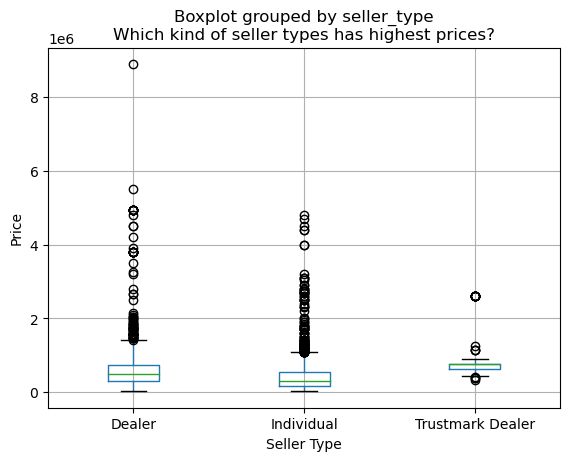

In [138]:
# Comparative boxplot to make comparison in terms of price among seller type
plt.figure(figsize=(10, 6))
# Plot the box plot
box_plot=df1_final.boxplot(column='selling_price', by='seller_type', xlabel = 'Seller Type', ylabel = 'Price')
# Add title to the graph 
plt.title('Which kind of seller types has highest prices?')

*From the box plot shown, it can be witnessed that the median selling_price of trustmark dealer has been highest, followed by the figure for dealer and then individual. However, individual was the group that had the largest number of expensive cars (as it has most outliers). In terms of the spread, dealer has the highest spread among all*

Text(0.5, 1.0, 'Changes in selling price of cars from 1992 to 2020')

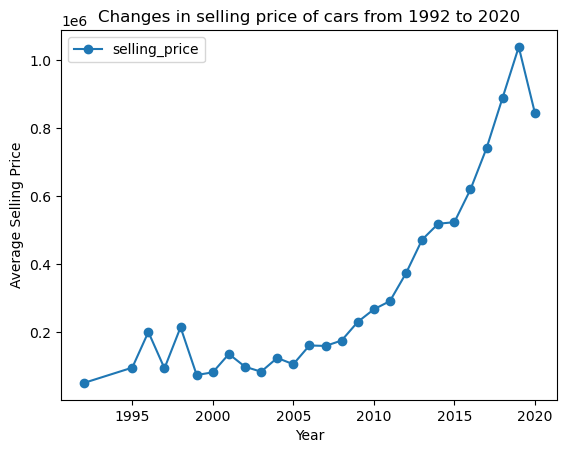

In [139]:
# Average selling_price through the whole period
df1_new = df1_final.groupby('year')['selling_price'].mean().reset_index()
df1_new.plot(x='year',y='selling_price',kind='line', marker ='o')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.title('Changes in selling price of cars from 1992 to 2020')

*The average selling price of car witnessed a positive trend from 1992 to 2020 as it increased significantly (excepf for a considerable drop between 1996 - 1997 and 1999 - 2000) before reaching a peak of around 1,000,000 in 2019. In 2020, the average selling price of car recorded a dramatic drop to approximately 800,000.*

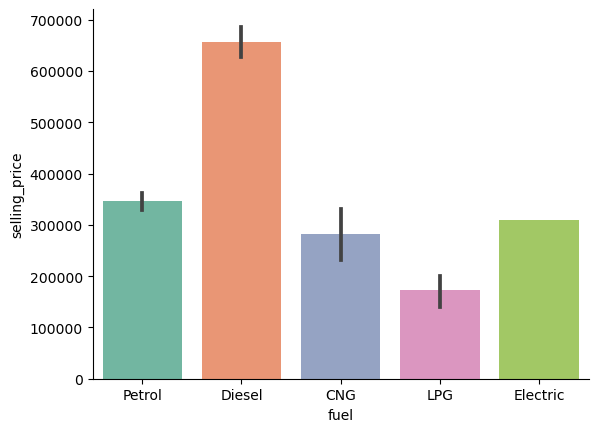

In [140]:
# Bar plot for average selling_price by fuel type
df1_fuel = df1_final.groupby('fuel')['selling_price'].mean().reset_index()
sns.barplot(y = df1_final['selling_price'], x = df1_final['fuel'], palette = 'Set2')
sns.despine()

*Looking at the bar graph, we could see that cars with Diesel has the highest average selling price among all, followed by the figure for CNG, Electric and Petrol (which were approximately similar to one another). Oppositely, the average selling price of LPG accounted for the lowest selling price.*

<Axes: title={'center': 'Distribution of selling price of manual transmission'}, xlabel='Selling Price', ylabel='Samples'>

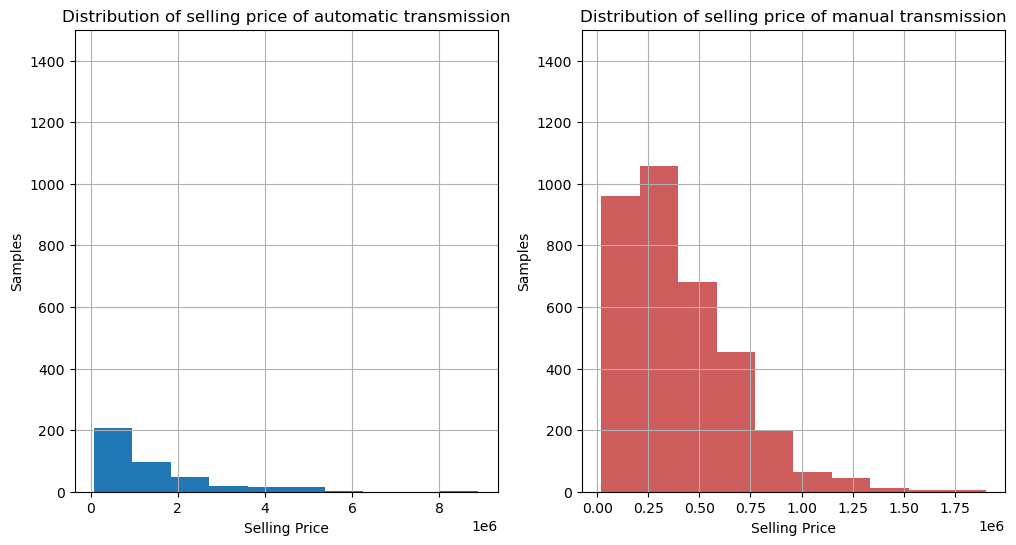

In [141]:
#Correlation between transmission and selling price:
Automatic = df1_final[df1_final['transmission']=='Automatic']
Manual = df1_final[df1_final['transmission']=='Manual']
plt.figure(figsize=(12,6)) 
plt.subplot(1,2,1) 
plt.ylim(0,1500)
plt.xlabel('Selling Price',size = 10)
plt.ylabel("Samples")
plt.title('Distribution of selling price of automatic transmission')
Automatic.selling_price.hist(histtype='stepfilled', bins = 10)
plt.subplot(1,2,2) 
plt.ylim(0,1500)
plt.xlabel('Selling Price',size = 10)
plt.ylabel("Samples")
plt.title('Distribution of selling price of manual transmission')
Manual.selling_price.hist(histtype='stepfilled', bins = 10, color = 'indianred')

*From the histogram, we could see that the distribution for both transmission types were left-skewed, which shows that the cars with lower price were mostly bought for both transmisstion types. Moreover, in terms of the median of the price, we could see that the selling price for manually-tranmission car was much lower than automatic ones (with the median price of manual car being 250,000, compared to 1,000,000 of automatic car.*

Text(0, 0.5, 'Selling_price')

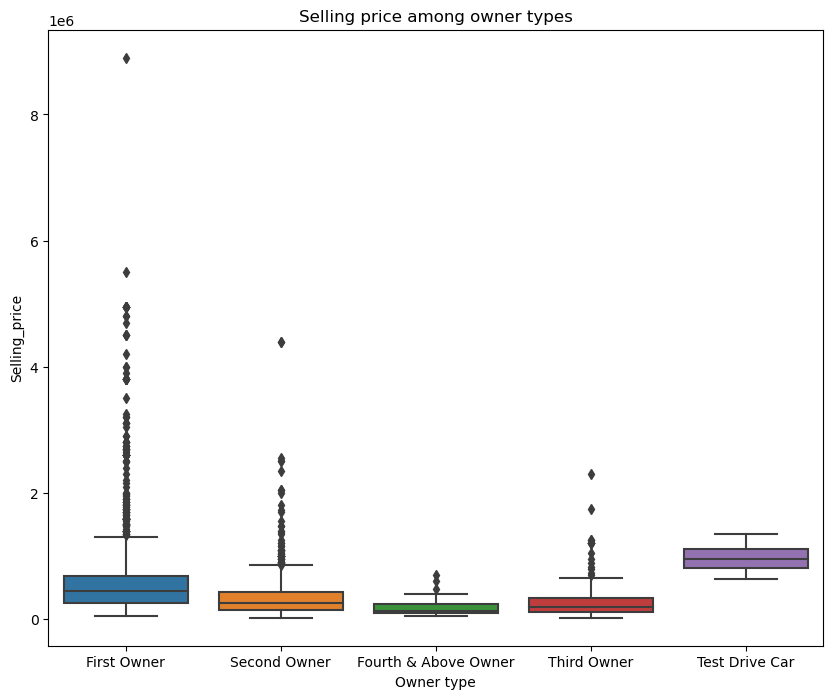

In [142]:
# Comparative boxplot to make comparison in terms of price among owner type
import seaborn as sns 
plt.figure(figsize=(10,8))
sns.boxplot(x='owner',y='selling_price',data = df1_final)
plt.title("Selling price among owner types")
plt.xlabel("Owner type")
plt.ylabel("Selling_price")

*From the boxplot shown, we could see that First Owner car was most spread among all, while the median of Test Drive Car accounted for the highest. Therefore, we can conclude that, the price of First Owner car tended to be highest (as it has the largest number of high-value outliers) while the opposite figure was recorded for Fourth & Abover Owner car as it least spreads among all and its median was lowest.*

**OVERALL SUMMARY:**
From all the 5 plots created, we could conclude that the car sold by trustmark dealer, with Diesel fuel, has automatic transmission and being the First-Owner car tends to has highest price. Moreover, we could also conclude that the price of car will increase as time goes, this is understandable due to the inflation and economic reasons.

## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [143]:
# remove outliers - remove rows with owners NOT first,second and third owner
df1_clean = df1_final.drop(df1_final.index[(df1_final.owner != 'First Owner') &
                                      (df1_final['owner'] != 'Second Owner') &
                                       (df1_final['owner'] !='Third Owner')])
# remove outliers - remove rows with fuel NOT Diesel or Petrol
df1_clean_2nd = df1_clean.drop(df1_clean.index[(df1_clean.fuel!='Diesel') &
                                            (df1_clean['fuel']!='Petrol')])
# remove outliers - remove rows with seller_type NOT Individual or Dealer
df1_clean_final = df1_clean_2nd.drop(df1_clean_2nd.index[(df1_clean_2nd.seller_type != 'Individual') &
                                                   (df1_clean_2nd.seller_type != 'Dealer')])
# print the length of the data after removing 
print("The length of the data:", len(df1_clean_final))


The length of the data: 3657
